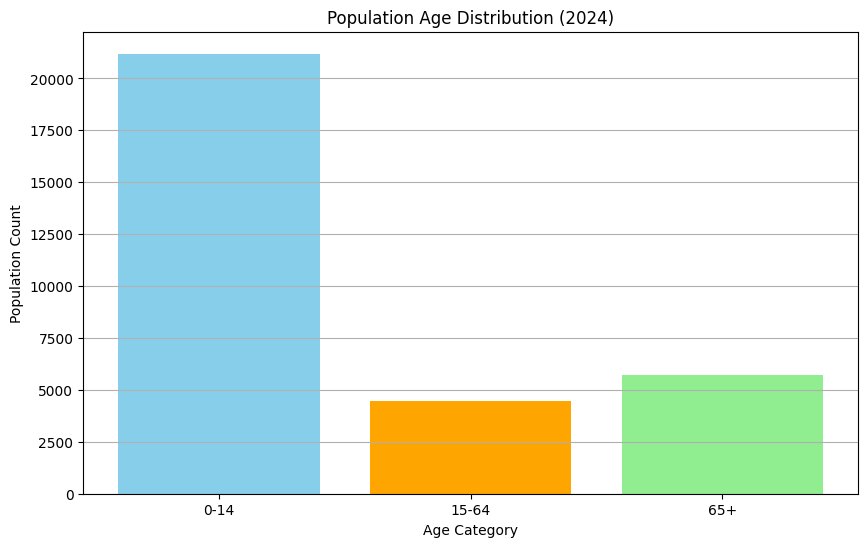

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir("C:\\Users\\PC\\Downloads\\animesh")

try:
    df = pd.read_excel("pop.xlsx")
except FileNotFoundError:
    print("file not found. Please check the name and path.")
    exit()
except Exception as e:
    print(f"Something went wrong: {e}")
    exit()

df.columns = df.columns.str.strip()

for col in ['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 8']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in ['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 8']:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

age_categories = ['0-14', '15-64', '65+']

df_stacked = df[['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 8']].copy()
df_stacked.columns = age_categories

total_population = df_stacked.sum()

plt.figure(figsize=(10, 6))
plt.bar(age_categories, total_population, color=['skyblue', 'orange', 'lightgreen'])
plt.xlabel('Age Category')
plt.ylabel('Population Count')
plt.title('Population Age Distribution (2024)')
plt.grid(axis='y')


plt.show()
